In [7]:

import numpy as np

import pynq

ol = pynq.Overlay("/home/xilinx/jupyter_notebooks/workshop/Session_2/pynq_tutorial/hw/bitstream/pynq_tutorial.bit")

led_addr = ol.ip_dict["swsleds_gpio"]['phys_addr']

from pynq import MMIO
CH2_OFFSET = 0x8
leds = MMIO(led_addr + CH2_OFFSET)

leds.write(0, 1) # Turn on LD0


from pynq import overlay
from pynq import DefaultIP


In [8]:
import pynq.lib.dma

sumol = pynq.Overlay("/home/xilinx/jupyter_notebooks/pp4fpga/sum/sumtest.bit")

# dma = overlay.const_multiply.multiply_dma
# multiply = overlay.const_multiply.multiply

dma = sumol.axi_dma_0
# s = sumol.sum_0


from pynq import Xlnk

xlnk = Xlnk()
in_buffer = xlnk.cma_array(shape=(128,), dtype=np.int32)
out_buffer = xlnk.cma_array(shape=(128,), dtype=np.int32)

for i in range(128):
    in_buffer[i] = 3;

dma.sendchannel.transfer(in_buffer)
dma.recvchannel.transfer(out_buffer)
# dma.sendchannel.wait()
# dma.recvchannel.wait()

print(in_buffer)
print(out_buffer)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[  3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54
  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 102 105 108
 111 114 117 120 123 126 129 132 135 138 141 144 147 150 153 156 159 162
 165 168 171 174 177 180 183 186 189 192 195 198 201 204 207 210 213 216
 219 222 225 228 231 234 237 240 243 246 249 252 255 258 261 264 267 270
 273 276 279 282 285 288 291 294 297 300 303 306 309 312 315 318 321 324
 327 330 333 336 339 342 345 348 351 354 357 360 363 366 369 372 375 378
 381 384]


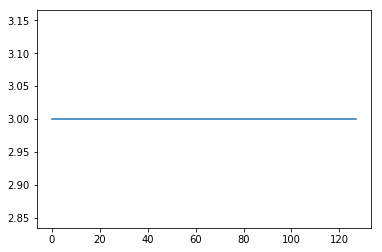

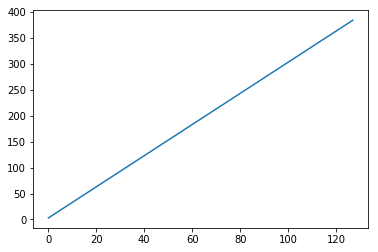

In [9]:
import pylab as py
import scipy as scipy
import matplotlib.pyplot as plt
import scipy.fftpack
import numpy.fft


fig1 = plt.figure()
ax1 = fig1.gca()
plt.plot(in_buffer)

fig2 = plt.figure()
ax2 = fig2.gca()

plt.plot(out_buffer)